<a href="https://colab.research.google.com/github/shcho11/ML_Practices_2022_KB/blob/main/Linear_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Exercise

뉴욕에 위치한 한 이커머스 회사가 있습니다. 이 회사는 온라인에서 옷을 판매하면서 오프라인 스토어에서(in-store) 스타일링이나 옷에 관한 조언을 하는 세션을 열기도 합니다.  
고객들은 스토어에 방문해서 스타일리스트와의 세션이나 미팅을 갖게 되고 집으로 돌아가서 모바일앱 또는 웹사이트에서 원하는 옷을 주문하는 구조입니다.  

이 회사는 모바일앱 또는 웹사이트에 집중해야 할지를 데이터를 기반으로 결정하려고 합니다.

아래 절차를 따라 커스터머 데이터를 분석하세요.

## Imports
**pandas, numpy, matplotlib, sklearn 등 필요할 때마다 라이브러리 추가**

In [1]:
# Code Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0


## Get the Data

회사에서 제공한 CSV 파일에는 이메일, 주소, 아바타 색깔(Avatar) 등의 고객정보와 함께 아래와 같은 칼럼의 숫자 데이터들이 포함되어있습니다.

* Avg. Session Length: 평균 in-store 스타일링 세션 시간
* Time on App: 앱에서 소비한 시간(분)
* Time on Website: 웹사이트에서 소비한 시간(분)
* Length of Membership: 회원가입 기간 (년)
* Yearly Amount Spent : 회원의 연간 매출 (달러) 

**EcommerceCustomers.csv 파일을 읽고 df 라는 이름의 DataFrame 을 만드세요.**

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
# Code Here
customers = pd.read_csv("/content/drive/MyDrive/dtstep2/EcommerceCustomers.csv")

In [12]:
# 출력 결과값 없음
df = pd.DataFrame(customers)
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


**head(), info() 함수를 사용하여 데이터를 살펴봅니다.**

In [13]:
# CODE HERE
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Training and Testing Data

**customers DataFrame 에서 숫자로된 컬럼들만 셀렉트해서 변수 X 에 저장하고, "Yearly Amount Spent" 칼럼은 변수 y 에 저장하세요**

In [52]:
# CODE HERE

x = df[df.columns[3:-1]]
y = df[["Yearly Amount Spent"]]

In [53]:
# 실행결과없음
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [54]:
y.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


**sklearn 의 model_selection.train_test_split 를 사용해서 training 데이터와 testing 데이터로 7:3 으로분리하세요. hint test_size 파라메터 전달**

In [55]:
# CODE HERE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [56]:
x_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550


## Training the Model

**sklearn.linear_model 의 LinearRegression 을 import**

In [57]:
# CODE HERE
from sklearn.linear_model import LinearRegression

**LinearRegression() 인스턴스를 생성해서 lm 에 저장**

In [58]:
# CODE HERE
lm = LinearRegression()

**training 데이터에 대해 모델 학습**

In [59]:
# CODE HERE
lm.fit(x_train, y_train)

LinearRegression()

**학습된 모델의 coefficients 출력**

In [60]:
# CODE HERE
#print("Coefficients :", lm.coef_)
lm.coef_

array([[25.72425621, 38.59713548,  0.45914788, 61.67473243]])

## Predicting Test Data

**lm.predict() 를 이용해서 X_test 데이터에 대한 예측 수행**

In [93]:
# CODE HERE
y_predicted = lm.predict(x_test)

**실제 값에 상응하는 예측값의 조합을 scatterplot 으로 시각화 하세요.**

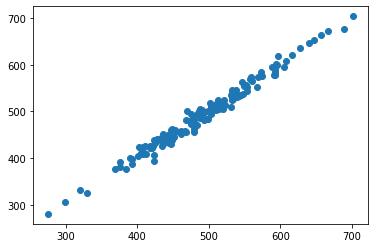

In [62]:
# CODE HERE
#x축은 real data, y축은 예측치
plt.scatter(y_test, y_predicted)

## Evaluating the Model

**sklearn 의 metircs 패키지를 import 한 후 패키지에서 제공되는 함수들로 Mean Absolute Error, Mean Squared Error, Root Mean Squared Error 를 계산하세요.**

In [63]:
# CODE HERE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [64]:
print(f'R2 : {r2_score(y_test, y_predicted)}')
print(f'MSE : {r2_score(y_test, y_predicted)}')
print(f'RMSE : {r2_score(y_test, y_predicted)}')

R2 : 0.9808757641125856
MSE : 0.9808757641125856
RMSE : 0.9808757641125856


## Conclusion

처음 문제로 돌아와서 모바일앱 또는 웹사이트 운영에 더 집중투자할지를 결정해야 합니다. 어쩌면 그보다 다른 요소들이 더 중요한지도 모릅니다. coefficient 를 살펴보면서 생각해봅시다.

**아래와 같이 coeffecient 에 대한 DataFrame 을 만드세요.**

In [91]:
# CODE HERE
pd.DataFrame(lm.coef_,index=['Coefficient'],columns=df.columns[3:-1])
#lm.coef_.tolist()
#lm.coef_

,Avg. Session Length,Time on App,Time on Website,Length of Membership
Coefficient,25.724256,38.597135,0.459148,61.674732


**이러한 계수를 어떻게 해석할 수 있습니까?**

**이 회사가 모바일앱 또는 웹사이트 운영에 집중투자해야한다고 생각하세요?**